## Author: REVATHY REMESH

### GRIPJULY21-The Spark Foundation-Data Science & Business Analytics Internship

### Task2:Prediction using UnSupervised ML



Machine learning is a method to learn patterns in data. By using it, we can automate tasks or discover hidden pieces of knowledge from it. There are many types of learning, but I want to specify only unsupervised learning.

Unsupervised learning is a learning method for unlabeled data. The main point of it is to extract hidden knowledge inside of the data. Clustering is one of them, where it groups the data based on its characteristics.

#### Problem Statement: 

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

**Overview**<br>
 'Iris.csv' dataset contain different  measurements of three types of iris.We need to find the optimum number of clusters in this dataset using K-Means Clustering Algorithum

The steps are broadly:
1. Read and understand the data
2. Clean the data
3. Prepare the data for modelling
4. Modelling
5. Final Analysis 

# 1. Read and visualise the data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

### Importing Dataframe

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the dataset
df=pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Inspecting Dataframe

In [4]:
print("Number of rows:",df.shape[0])
print("Number of columns:",df.shape[1])

Number of rows: 150
Number of columns: 6


In [5]:
# basics of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


 ## 2. Clean the data

In [7]:
#dropping index column,because it has unique values
df.drop(labels=None, axis=1, index=None, columns='Id', level=None, inplace=True, errors='raise')

### Preprocessing the data

Right after we download the dataset, there are several assumptions to meet. They are,

.Each column has a normal distribution (no left or right-skewed)
.Each column should have the same value range
The reason we have to check those assumptions is to make sure that we can use the machine learning model to the data. To know if the data fulfills the assumptions, we have to explore it visually. We can visualize each column using a histogram. The code looks like this,

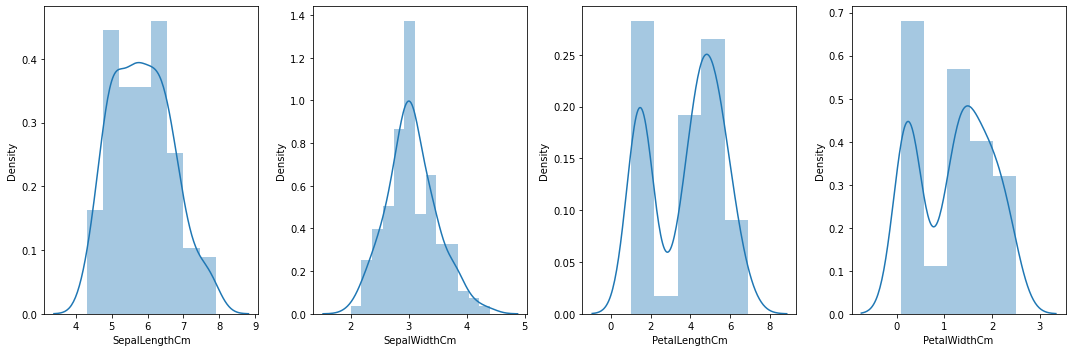

In [8]:
fig, ax = plt.subplots(1, 4, figsize=(15,5))
sns.distplot(df.SepalLengthCm, ax=ax[0])
sns.distplot(df.SepalWidthCm , ax=ax[1])
sns.distplot(df.PetalLengthCm , ax=ax[2])
sns.distplot(df.PetalWidthCm , ax=ax[3])
plt.tight_layout()
plt.show()

As we can see above, the distribution on each column is closer to a normal

##  3.Prepare the data for modelling

In [9]:
X=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values

## 4. Modelling

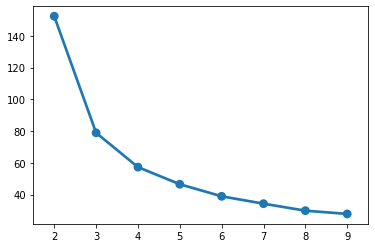

In [10]:
# Import the library
from sklearn.cluster import KMeans# To make sure our work becomes reproducible
np.random.seed(50)
inertia = []# Iterating the process
for i in range(2, 10):
  # Instantiate the model
    model = KMeans(n_clusters=i)
  # Fit The Model
    model.fit(X)
  # Extract the error of the model
    inertia.append(model.inertia_)# Visualize the model
sns.pointplot(x=list(range(2, 10)), y=inertia)
plt.show()

As we can see above, number 3 is the best parameter for our model. The reason for that is because the error starts to decrease slowly. Therefore, we will use number 3 as the number for our cluster. Now, we can apply the model to our data and save the clustering result to our data frame.

### Finding the Optimal Number of Clusters

In [11]:
# To make sure our work becomes reproducible
np.random.seed(50)# Instantiate the model
model = KMeans(n_clusters=3)# Fit the model
model.fit(X)# Predict the cluster from the data and save it
cluster = model.predict(X)# Add to the dataframe and show the result
df['cluster'] = cluster
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


## 5. Final Analysis 

we will analyze each of them and create a bar chart. The code for doing this looks like this,

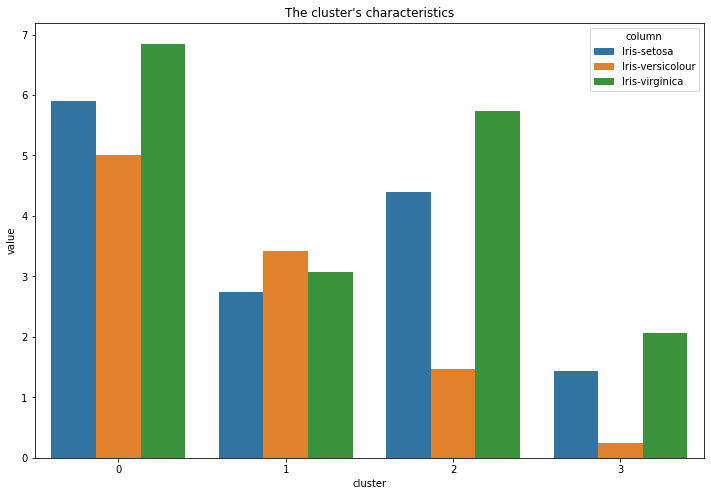

In [12]:
# Importing libraries
import seaborn as sns
import matplotlib.pyplot as plt# Create the dataframe to ease our visualization process
visualize = pd.DataFrame(model.cluster_centers_)
visualize['column'] = ['Iris-setosa', 'Iris-versicolour', 'Iris-virginica']
visualize = visualize.melt(id_vars=['column'], var_name='cluster')
visualize['cluster'] = visualize.cluster.astype('category')# Visualize the result
plt.figure(figsize=(12, 8))
sns.barplot(x='cluster', y='value', hue='column', data=visualize)
plt.title('The cluster\'s characteristics')
plt.show()

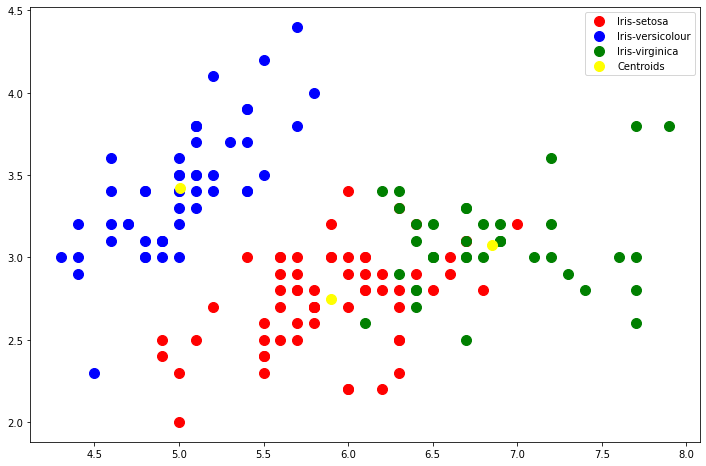

In [13]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(12, 8))
plt.scatter(X[cluster == 0, 0], X[cluster == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[cluster == 1, 0], X[cluster == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[cluster== 2, 0], X[cluster == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
centroids =  model.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()